# City of Tucson's Climate Action and Adaptation Plan Community Survey

The City is seeking input on priorities for both government and community-wide climate and environmental sustainability actions.

Mayor Regina Romero is inviting the community to complete a survey to kick start the process of developing Tucson’s Climate Action Plan. This input will help create a roadmap to reduce emissions of heat-trapping greenhouse gases and respond to and prepare for the increasing impacts of climate change. The goal is to improve the city’s environmental and sustainability practices while increasing Tucsonan’s quality of life for decades.

![Overview](overview.png "Overview")

**Questions to analyze:**

- Do you have other climate mitigation ideas? Submit here:
- Do you have other climate adaptation ideas? Submit here:
- Do you have other ideas for environmental equity, justice, and community resilience? Submit here:
- Do you have other policy ideas? Submit here:
- Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:
- Is there anything else you would like to share that was not already addressed?

## Wordclouds

In [1]:
# Esta celda contiene funciones de utilidad para la preparación de los datos para el
# análisis de texto.

import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descarga los elementos de NLTK necesarios.
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

def get_unwanted_words():
    """
    Genera la lista de palabras irrelevantes para el análisis de sentimientos y que 
    por tanto se ignorarán. Entre estos tipos de palabras se encuentran artículos, 
    pronombres, preposiciones, conjunciones y palabras definidas por nosotros mismos.
    """
    unwanted = nltk.corpus.stopwords.words("english")
    unwanted.extend([w.lower() for w in nltk.corpus.names.words()])
    unwanted.extend(['tucson', 'city', 'people'])
    return unwanted


def get_column_clean_copy(dataframe, column_name):
    """
    Copia y limpia los valores de una columna en un dataframe nuevo.
    """
    df_copy = dataframe[[column_name]].copy()
    df_copy = df_copy.replace(r'\n', ' ', regex=True) 
    df_copy = df_copy.replace(r'^\s*no\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*NO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*No\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*nO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*-\s*$', '', regex=True)
    nan_value = float("NaN")
    df_copy.replace('', nan_value, inplace=True)
    df_copy = df_copy.dropna()
    return df_copy


def filter_words_array(words, unwanted_words):
    """
    Filtra una lista de palabras de acuerdo a una lista establecida y otros
    parámetros utilizados para dejar solamente palabras útiles para el
    análisis de texto.
    """
    # Elimina palabras no deseadas.
    words = [w.lower() for w in words if w.lower() not in unwanted_words]
    # Elimina tokens no alfabéticos.
    words = [w.lower() for w in words if w.isalpha()]
    return words


def create_word_cloud(words, title=None):
    """
    Genera una wordcloud a partir de una lista de palabras.
    Esta función no realiza filtros de unwanted words, las
    palabras que se manden ya deben estar filtradas.
    """
    if len(words) == 0:
        words = ['NONE']
        
    # Concatena los tokens para formar una sola cadena
    text = ', '.join([word for word in words])

    # Configura la wordcloud
    wordcloud = WordCloud(width=1500, height=500,
                          background_color='white',
                          min_font_size=10).generate(text)

    # Muestra la wordcloud
    plt.figure(figsize=(15, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    if title is not None:
        plt.title(title, fontdict={
                  'family': 'sans', 'color': 'black', 'size': 50}, pad=20)
    plt.show()
    return wordcloud


def generate_sentiment_word_cloud(texts, title = ''):
    """
    Genera una wordcloud a partir de un arreglo de textos.
    """
    # Extrae las palabras de la pregunta.
    words = nltk.word_tokenize(', '.join(str(item) for item in texts))
    # Filtra las palabras de acuerdo a palabras indeseadas.
    words = filter_words_array(words, unwanted_words)
    # Genera la word cloud.
    wc = create_word_cloud(words, f'{title}')

[nltk_data] Downloading package names to /home/porfirio/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/porfirio/nlt

In [2]:
unwanted_words = get_unwanted_words()

## Entrenamiento

### Obtención de los datos

Lectura del dataset:

In [3]:
import pandas as pd


df = pd.read_csv(r'respuestas-tucson.csv', encoding='latin-1')

Creación de una copia del dataset eliminando las respuestas clasificadas como neutrales y reemplazando las etiquetas de los sentimientos a las esperadas por la librería textblob:

In [4]:
df2 = df.copy()
df2 = df2[['Answer', 'Sentiment']]
df2.drop(df2[df2['Sentiment'] == 'Neutral'].index, inplace=True)
df2['Sentiment'] = df2['Sentiment'].replace({'Positive': 'pos', 'Neutral': 'neu', 'Negative': 'neg'})
df2

Answer Sentiment
0   Planting shade trees along city walks to reduc...       pos
1   Changing roads from black asphalt to something...       pos
2   Tucson for the most part is not walkable. What...       neg
3   Tree planting, green space, restrict new devel...       pos
4   Truly, it seems that vehicle pollution in Tucs...       neg
..                                                ...       ...
88  Common sense is hard to find. Reuse Phoenix wa...       pos
89  Don't put on a super hero cape and roll out di...       neg
92  Thank you for your progressive policies. This ...       pos
93  Keep using social media to promote existing CO...       pos
94  Gratitude for the survey and the efforts of ma...       pos

[88 rows x 2 columns]

Creación de conjuntos de entrenamiento y de prueba:

In [5]:
from sklearn.model_selection import train_test_split


y = df2['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.25, random_state=1)

### Análisis de datos

In [6]:
from textblob.classifiers import DecisionTreeClassifier
dtcl = DecisionTreeClassifier(X_train.values)
dtcl.train()

In [7]:
from textblob.classifiers import MaxEntClassifier
mecl = MaxEntClassifier(X_train.values)
mecl.train()

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.621
             2          -0.05456        1.000
             3          -0.00999        1.000
             4          -0.00247        1.000
             5          -0.00075        1.000
             6          -0.00026        1.000
             7          -0.00009        1.000
             8          -0.00004        1.000
             9          -0.00001        1.000
            10          -0.00001        1.000
            11          -0.00000        1.000
            12          -0.00000        1.000
            13          -0.00000        1.000
            14          -0.00000        1.000
            15          -0.00000        1.000
            16          -0.00000        1.000
            17          -0.00000        1.000
            18          -0.00000        1.000
            19          -0.00000        1.000
 

<ConditionalExponentialClassifier: 2 labels, 2580 features>

In [8]:
from textblob.classifiers import NaiveBayesClassifier
nbcl = NaiveBayesClassifier(X_train.values)
nbcl.train()

In [9]:
import random
from textblob.classifiers import PositiveNaiveBayesClassifier

random.seed(7)
answers = set(df2['Answer'].values)
pos_answers = set(df2[df2['Sentiment'] == 'pos']['Answer'].values)
neg_answers = set(df2[df2['Sentiment'] == 'neg']['Answer'].values)
#print(f'ANS: {len(answers)}, POS: {len(pos_answers)}, NEG: {len(neg_answers)}')

train_size = int(len(answers) * .15)
#print(f'TRAIN SIZE: {train_size}')
train_pos_answers = random.sample(pos_answers, train_size)
train_unlabeled_answers = set(df2['Answer'].values) - set(train_pos_answers)
train_unlabeled_answers = random.sample(train_unlabeled_answers, train_size)

pnbcl = PositiveNaiveBayesClassifier(
    positive_set=train_pos_answers,
    unlabeled_set=train_unlabeled_answers
)

test_answers = X_test.copy()
test_answers['Sentiment'] = \
    test_answers['Sentiment'].replace(
        {'pos': True, 'neu': False, 'neg': False}
    )

pnbcl.train()

### Tipos de resultados

**Verdadero positivo:** Predijo positivo y es verdad.

**Verdadero negativo:** Predijo negativo y es verdad.

**Falso positivo:** Predijo positivo pero es falso.

**Falso negativo:** Predijo negativo pero es falso.

### Métricas de evaluación de clasificación

<!--
___

**Precision:** Proporción de los resultados predecidos como positivos que realmente son positivos.

\begin{equation}
PPV = \frac{TP}{TP + FP}
\end{equation}

Es útil cuando se quiere tener mucha seguridad de las predicciones .
-->

___

**Sensibilidad (sensitivity - recall):** Tasa de verdaderos positivos. Mide la proporción de los positivos que fueron correctamente identificados.

\begin{equation}
TPR = \frac{TP}{TP + FN}
\end{equation}

Es recomendable cuando se quieren capturar tantos positivos como sea posible.

___

**Especificidad (specificity):** Tasa de verdaderos negativos. Mide la proporción de los negativos que fueron correctamente identificados.

\begin{equation}
TNR = 1 - FPR = 1 - \frac{FP}{FP + TN}
\end{equation}

___

**AUC:** Área bajo la curva ROC. Indica qué tan bien se separan las probabilidades de las clases positivas de las clases negativas.

<!--
![Overview](auc.jpeg "Overview")
-->

*Nota: Para esta fase no se obtuvo esta métrica ya que requiere de las probabilidades de las clasificaciones, y el uso directo de los algoritmos entrenados por nuestro conjunto clasificado solo proporciona el sentimiento final, más no las probabilidades. Esta métrica se sacará en fases posteriores cuando se haga la extracción de características*

___

**Accuracy:** Proporción de los elementos clasificados correctamente.

\begin{equation}
Accuracy = \frac{TP + TN}{TP + FP + FN + TN}
\end{equation}

Es recomendable para problemas de clasificación balanceados y no sesgados.

<!--
___

**Kappa:** Medida estadística que ajusta el efecto del azar en la proporción de la concordancia observada para elementos cualitativos (variables categóricas). En general se cree que es una medida más robusta que el simple cálculo del porcentaje de concordancia, ya que k tiene en cuenta el acuerdo que ocurre por azar.

| Valor     | Significado  |
|-----------|--------------|
| < 0       | No agreement |
| 0 - .20   | Slight       |
| .21 - .40 | Fair         |
| .41 - .60 | Moderate     |
| .81 - 1.0 | Perfect      |
-->

In [10]:
from sklearn.metrics import cohen_kappa_score


def classify(dataframe, to_classify, y_real, *classifiers):
    metrics = {}
    
    for classifier in classifiers:
        dataframe[classifier[0]] = ''
        metrics[classifier[0]] = {
            'TP': 0,
            'FP': 0,
            'TN': 0,
            'FN': 0,
            'Sensitivity': 0,
            'Specificity': 0,
            #'AUC': 0,
            'Accuracy': 0,
            'Kappa': 0
        }
        
    for index, row in dataframe.iterrows():
        for classifier in classifiers:
            if classifier[1] is not None:
                row[classifier[0]] = classifier[1].classify(row[to_classify])
                
    if 'PositiveNaiveBayes' in dataframe.columns:
        dataframe['PositiveNaiveBayes'] = dataframe['PositiveNaiveBayes'].replace({True: 'pos', False: 'neg'})
    
    for index, row in dataframe.iterrows():
        for classifier in classifiers:
            if row[y_real] == 'pos':
                if row[classifier[0]] == 'pos':
                    metrics[classifier[0]]['TP'] += 1
                else:
                    metrics[classifier[0]]['FP'] += 1
            else:
                if row[classifier[0]] == 'neg':
                    metrics[classifier[0]]['TN'] += 1
                else:
                    metrics[classifier[0]]['FN'] += 1
    
    for classifier in classifiers:
        tp = metrics[classifier[0]]['TP']
        fp = metrics[classifier[0]]['FP']
        tn = metrics[classifier[0]]['TN']
        fn = metrics[classifier[0]]['FN']
        metrics[classifier[0]]['Sensitivity'] = (tp) / (tp + fn)
        metrics[classifier[0]]['Specificity'] = 1 - ((fp) / (fp + tn))
        metrics[classifier[0]]['Accuracy'] = (tp + tn) / (tp + fp + fn + tn)
        kappa = cohen_kappa_score(dataframe['Sentiment'].values, dataframe[classifier[0]].values)
        metrics[classifier[0]]['Kappa'] = kappa
        
    return metrics

def get_metrics(dataframe, y_real, *classifiers):
    metrics = {}
    
    for classifier in classifiers:
        metrics[classifier] = {
            'TP': 0,
            'FP': 0,
            'TN': 0,
            'FN': 0,
            'Sensitivity': 0,
            'Specificity': 0,
            #'AUC': 0,
            'Accuracy': 0,
            'Kappa': 0
        }
        
    
    for index, row in dataframe.iterrows():
        for classifier in classifiers:
            if row[y_real] == 'pos':
                if row[classifier] == 'pos':
                    metrics[classifier]['TP'] += 1
                else:
                    metrics[classifier]['FP'] += 1
            else:
                if row[classifier] == 'neg':
                    metrics[classifier]['TN'] += 1
                else:
                    metrics[classifier]['FN'] += 1
    
    for classifier in classifiers:
        tp = metrics[classifier]['TP']
        fp = metrics[classifier]['FP']
        tn = metrics[classifier]['TN']
        fn = metrics[classifier]['FN']
        metrics[classifier]['Sensitivity'] = (tp) / (tp + fn)
        metrics[classifier]['Specificity'] = 1 - ((fp) / (fp + tn))
        metrics[classifier]['Accuracy'] = (tp + tn) / (tp + fp + fn + tn)
        kappa = cohen_kappa_score(dataframe['Sentiment'].values, dataframe[classifier].values)
        metrics[classifier]['Kappa'] = kappa
        
    return metrics

In [11]:
classified_df2 = X_test.copy()

metrics = classify(
    classified_df2,
    'Answer',
    'Sentiment',
    ['DecisionTree', dtcl],
    ['MaxEntropy', mecl],
    ['NaiveBayes', nbcl],
    ['PositiveNaiveBayes', pnbcl]
)

metrics

{'DecisionTree': {'TP': 12,
  'FP': 5,
  'TN': 3,
  'FN': 2,
  'Sensitivity': 0.8571428571428571,
  'Specificity': 0.375,
  'Accuracy': 0.6818181818181818,
  'Kappa': 0.2524271844660194},
 'MaxEntropy': {'TP': 13,
  'FP': 4,
  'TN': 3,
  'FN': 2,
  'Sensitivity': 0.8666666666666667,
  'Specificity': 0.4285714285714286,
  'Accuracy': 0.7272727272727273,
  'Kappa': 0.31958762886597936},
 'NaiveBayes': {'TP': 16,
  'FP': 1,
  'TN': 1,
  'FN': 4,
  'Sensitivity': 0.8,
  'Specificity': 0.5,
  'Accuracy': 0.7727272727272727,
  'Kappa': 0.17910447761194037},
 'PositiveNaiveBayes': {'TP': 14,
  'FP': 3,
  'TN': 1,
  'FN': 4,
  'Sensitivity': 0.7777777777777778,
  'Specificity': 0.25,
  'Accuracy': 0.6818181818181818,
  'Kappa': 0.025316455696202556}}

In [12]:
classified_df2

Answer Sentiment DecisionTree  \
64  Please discourage planting green grass in a de...       neg          neg   
73  I will put solar panels in when the lightweigh...       pos          pos   
57  Roller shields and solar tube lighting should ...       pos          pos   
58  The best way a government can facilitate equit...       pos          neg   
74  I would like to see the commuter cars China ha...       pos          pos   
92  Thank you for your progressive policies. This ...       pos          neg   
63  green buildings (living walls, rooftop gardens...       pos          pos   
43  Our homelessness issues are more complex than ...       pos          pos   
47  The City should be careful of trying to solve ...       neg          neg   
40  In addition, I strongly encourage implementing...       pos          pos   
41  Also, I support tree planting/re-greening but ...       pos          pos   
33  Need residential solar subsidies and more smal...       pos          pos   
71  Trees require too much water and the roots imp...       neg          pos   
28  Better drought emergency preparednessâ??put in...       pos          neg   
94  Gratitude for the survey and the efforts of ma...       pos          pos   
52  What do you mean by "promote"? Offering tax in...       pos          pos   
11  Fix all the streets and roads and then you can...       pos          pos   
2   Tucson for the most part is not walkable. What...       neg          neg   
38  Explain why things are being changed, to creat...       pos          pos   
72  Food and waste is needed in our garbage to pro...       pos          neg   
49  Affordability. We need to protect the most vul...       pos          neg   
20  What does your race have to do with climate ch...       neg          pos   

   MaxEntropy NaiveBayes PositiveNaiveBayes  
64        neg        pos                pos  
73        pos        pos                neg  
57        pos        pos                neg  
58        pos        pos                pos  
74        pos        pos                pos  
92        neg        pos                pos  
63        pos        pos                pos  
43        neg        neg                pos  
47        neg        neg                neg  
40        pos        pos                pos  
41        neg        pos                pos  
33        pos        pos                pos  
71        pos        pos                pos  
28        pos        pos                pos  
94        neg        pos                neg  
52        pos        pos                pos  
11        pos        pos                pos  
2         pos        pos                pos  
38        pos        pos                pos  
72        pos        pos                pos  
49        pos        pos                pos  
20        neg        pos                pos

In [13]:
alldf2 = df2.copy()

metrics = classify(
    alldf2,
    'Answer',
    'Sentiment',
    ['DecisionTree', dtcl],
    ['MaxEntropy', mecl],
    ['NaiveBayes', nbcl],
    ['PositiveNaiveBayes', pnbcl]
)

metrics

{'DecisionTree': {'TP': 53,
  'FP': 5,
  'TN': 28,
  'FN': 2,
  'Sensitivity': 0.9636363636363636,
  'Specificity': 0.8484848484848485,
  'Accuracy': 0.9204545454545454,
  'Kappa': 0.8271604938271605},
 'MaxEntropy': {'TP': 54,
  'FP': 4,
  'TN': 28,
  'FN': 2,
  'Sensitivity': 0.9642857142857143,
  'Specificity': 0.875,
  'Accuracy': 0.9318181818181818,
  'Kappa': 0.8506787330316742},
 'NaiveBayes': {'TP': 57,
  'FP': 1,
  'TN': 18,
  'FN': 12,
  'Sensitivity': 0.8260869565217391,
  'Specificity': 0.9473684210526316,
  'Accuracy': 0.8522727272727273,
  'Kappa': 0.639344262295082},
 'PositiveNaiveBayes': {'TP': 44,
  'FP': 14,
  'TN': 10,
  'FN': 20,
  'Sensitivity': 0.6875,
  'Specificity': 0.41666666666666663,
  'Accuracy': 0.6136363636363636,
  'Kappa': 0.09661835748792258}}

### Matrices de confusión

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt


def plot_confussion_matrix(dataframe, y_actual, y_pred):
    # Genera la matriz de confusión
    confussion_matrix = pd.crosstab(
        classified_df2[y_actual],
        classified_df2[y_pred],
        rownames=[y_actual],
        colnames=[y_pred],
        normalize='index'
    ).round(4) * 100

    # Muestra heatmap de la matriz de confusión
    sn.heatmap(confussion_matrix, annot=True, cmap='Blues')
    plt.show()
    
    return confussion_matrix

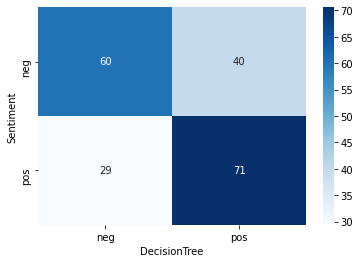

DecisionTree    neg    pos
Sentiment                 
neg           60.00  40.00
pos           29.41  70.59

In [15]:
plot_confussion_matrix(alldf2, 'Sentiment', 'DecisionTree')

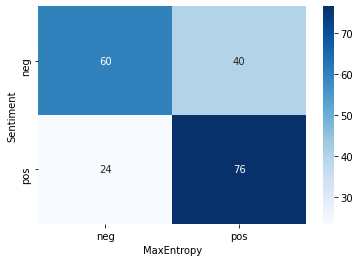

MaxEntropy    neg    pos
Sentiment               
neg         60.00  40.00
pos         23.53  76.47

In [16]:
plot_confussion_matrix(alldf2, 'Sentiment', 'MaxEntropy')

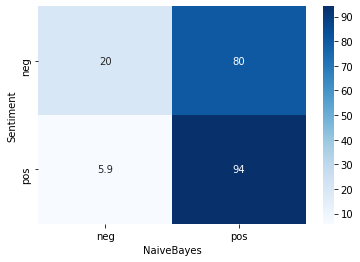

NaiveBayes    neg    pos
Sentiment               
neg         20.00  80.00
pos          5.88  94.12

In [17]:
plot_confussion_matrix(alldf2, 'Sentiment', 'NaiveBayes')

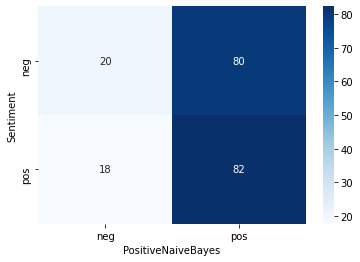

PositiveNaiveBayes    neg    pos
Sentiment                       
neg                 20.00  80.00
pos                 17.65  82.35

In [18]:
plot_confussion_matrix(alldf2, 'Sentiment', 'PositiveNaiveBayes')

## Resultados

In [19]:
alldf2

Answer Sentiment DecisionTree  \
0   Planting shade trees along city walks to reduc...       pos          pos   
1   Changing roads from black asphalt to something...       pos          pos   
2   Tucson for the most part is not walkable. What...       neg          neg   
3   Tree planting, green space, restrict new devel...       pos          pos   
4   Truly, it seems that vehicle pollution in Tucs...       neg          neg   
..                                                ...       ...          ...   
88  Common sense is hard to find. Reuse Phoenix wa...       pos          pos   
89  Don't put on a super hero cape and roll out di...       neg          neg   
92  Thank you for your progressive policies. This ...       pos          neg   
93  Keep using social media to promote existing CO...       pos          pos   
94  Gratitude for the survey and the efforts of ma...       pos          pos   

   MaxEntropy NaiveBayes PositiveNaiveBayes  
0         pos        pos                pos  
1         pos        pos                neg  
2         pos        pos                pos  
3         pos        pos                pos  
4         neg        neg                pos  
..        ...        ...                ...  
88        pos        pos                neg  
89        neg        neg                pos  
92        neg        pos                pos  
93        pos        pos                pos  
94        neg        pos                neg  

[88 rows x 6 columns]

In [20]:
from collections import Counter


def most_frequent(items):
    occurence_count = Counter(items)
    return occurence_count.most_common(1)[0][0]

In [21]:
max_votings = []

for index, row in alldf2.iterrows():
    items = [
        row['DecisionTree'],
        row['MaxEntropy'],
        row['NaiveBayes'],
        row['PositiveNaiveBayes']
    ]
    mf = most_frequent(items)
    max_votings.append(mf)

alldf2['MaxVoting'] = max_votings
alldf2

Answer Sentiment DecisionTree  \
0   Planting shade trees along city walks to reduc...       pos          pos   
1   Changing roads from black asphalt to something...       pos          pos   
2   Tucson for the most part is not walkable. What...       neg          neg   
3   Tree planting, green space, restrict new devel...       pos          pos   
4   Truly, it seems that vehicle pollution in Tucs...       neg          neg   
..                                                ...       ...          ...   
88  Common sense is hard to find. Reuse Phoenix wa...       pos          pos   
89  Don't put on a super hero cape and roll out di...       neg          neg   
92  Thank you for your progressive policies. This ...       pos          neg   
93  Keep using social media to promote existing CO...       pos          pos   
94  Gratitude for the survey and the efforts of ma...       pos          pos   

   MaxEntropy NaiveBayes PositiveNaiveBayes MaxVoting  
0         pos        pos                pos       pos  
1         pos        pos                neg       pos  
2         pos        pos                pos       pos  
3         pos        pos                pos       pos  
4         neg        neg                pos       neg  
..        ...        ...                ...       ...  
88        pos        pos                neg       pos  
89        neg        neg                pos       neg  
92        neg        pos                pos       neg  
93        pos        pos                pos       pos  
94        neg        pos                neg       pos  

[88 rows x 7 columns]

In [22]:
cpalldf2 = alldf2.copy()

metrics = get_metrics(
    cpalldf2,
    'Sentiment',
    'MaxVoting'
)

metrics

{'MaxVoting': {'TP': 57,
  'FP': 1,
  'TN': 27,
  'FN': 3,
  'Sensitivity': 0.95,
  'Specificity': 0.9642857142857143,
  'Accuracy': 0.9545454545454546,
  'Kappa': 0.897196261682243}}

In [48]:
positives = []
negatives = []

for index, row in cpalldf2.iterrows():
    if row['MaxVoting'] == 'pos':
        positives.append(row['Answer'])
    else:
        negatives.append(row['Answer'])
        
print(f'POS: {len(positives)}, NEG: {len(negatives)}')

POS: 60, NEG: 28


Positivas

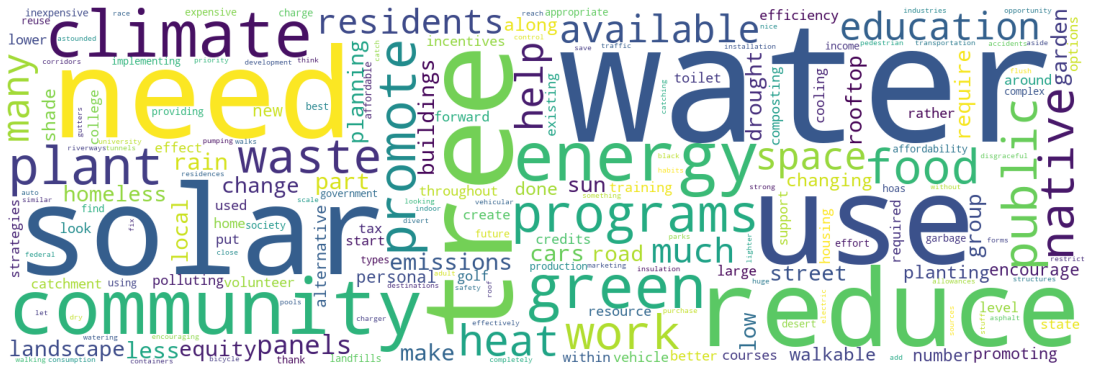

In [24]:
generate_sentiment_word_cloud(positives)

Negativas

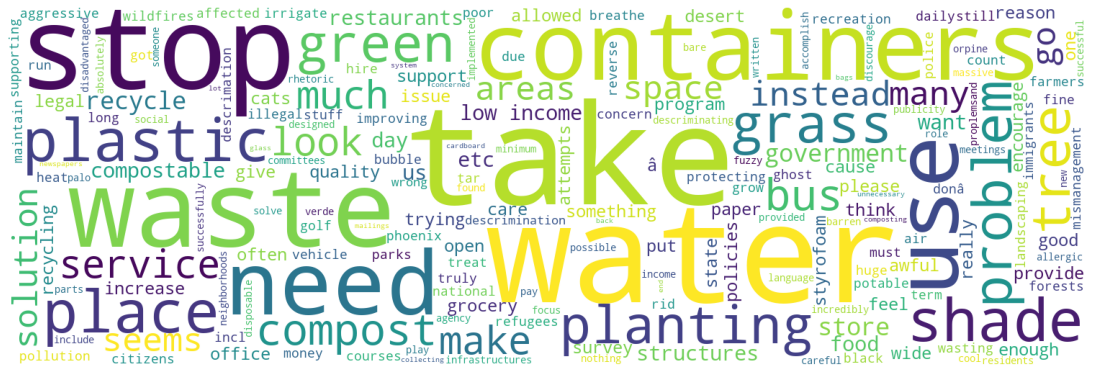

In [25]:
generate_sentiment_word_cloud(negatives)

## Dataset completo

In [26]:
df = pd.read_csv(r'tucson-caapcs-2021-05-13-20-45_2.csv', encoding='latin-1')

# Declara los nuevos nombres para las columnas de interés.
new_col_names = {
    'Do you have other climate mitigation ideas? Submit here:': 'climate_mitigation_ideas',
    'Do you have other climate adaptation ideas? Submit here:': 'climate_adaptation_ideas',
    'Do you have other ideas for environmental equity, justice, and community resilience? Submit here:': 'environmental_equity_ideas',
    'Do you have other policy ideas? Submit here:': 'policy_ideas',
    'Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:': 'environment_sustainable_ideas',
    'Is there anything else you would like to share that was not already addressed?': 'other_ideas',
}

# Renombra las columnas.
df.rename(columns=new_col_names, inplace=True)

# Declara los nombres de las columnas.
columns = [
    'climate_mitigation_ideas',
    'climate_adaptation_ideas',
    'environmental_equity_ideas',
    'policy_ideas',
    'environment_sustainable_ideas',
    'other_ideas'
]

# Crea una copia del dataframe que solo incluya las columnas deseadas.
df = df[columns].copy()

# Muestra algunos ejemplos de registros.
df.head(5)

climate_mitigation_ideas climate_adaptation_ideas  \
0  Re-engineer parking areas to reduce asphalt th...                      NaN   
1                                                NaN                      NaN   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4                                                NaN                      NaN   

                          environmental_equity_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  solar and rainwater harvesting are very differ...   
4                                                NaN   

                                        policy_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  It should not be just drought resistant, but n...   
4                                                NaN   

                       environment_sustainable_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  You ought to be paying more attention to natur...   
4                                                NaN   

                                         other_ideas  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  Sustainability involves planning for nature, n...  
4                                                NaN

In [27]:
cmi_df = get_column_clean_copy(df, 'climate_mitigation_ideas')
cmi_df

climate_mitigation_ideas
0     Re-engineer parking areas to reduce asphalt th...
8     The should stop overmanaging and let the priva...
10    The recent change that removes glass from curb...
22    Convert city fleet to electric. City employee ...
23    How much is this all going to cost!!!!? Why do...
...                                                 ...
2135  Extensive public transit and reducing the urba...
2136  Focus on a local water approach. Reduce relian...
2137  the city does not have a climate objective - m...
2138  Citizens should unite to condemn the worlds la...
2140  Residential option for Glass recycle bins alon...

[628 rows x 1 columns]

In [28]:
cai_df = get_column_clean_copy(df, 'climate_adaptation_ideas')
cai_df

climate_adaptation_ideas
11    Shouldn't group green infrastructure with wate...
12    You need to keep the manufactured racial issue...
17    Anything that can be done to reduce ground tem...
31    I believe water security is a huge issue that ...
34    The last question seems inappropriate for this...
...                                                 ...
2134  implement permaculture design throughout the city
2135  Subsidize education/training for green jobs. D...
2136  Make sure to plant the most hearty native tree...
2137  what about water?  How much per citizen?   Way...
2138  The amount and frequency of deliveries made ar...

[412 rows x 1 columns]

In [29]:
eei_df = get_column_clean_copy(df, 'environmental_equity_ideas')
eei_df

environmental_equity_ideas
3     solar and rainwater harvesting are very differ...
5     I guess I just canât understand why these ar...
11    Tree planting is an old idea that has migrated...
12    The political issues need to be removed from t...
24    Zoning must limit the number of rentals allowe...
...                                                 ...
2120  Our answers may seem unusual due to our strong...
2132                           none that I can think of
2134  Provide more affordable housing for senior low...
2136  Make sure all neighborhoods, especially limite...
2138  Everyone has to have a stake in this and contr...

[362 rows x 1 columns]

In [30]:
poi_df = get_column_clean_copy(df, 'policy_ideas')
poi_df

policy_ideas
3     It should not be just drought resistant, but n...
11    Standard grass parks,  golf courses, and uncon...
12    You want to plant a million trees?  The city c...
33    Having a "green corps" program would be amazin...
34    Thereâs already colleges providing this educ...
...                                                 ...
2132             none that I can think of at the moment
2135  I know it's in there but please create green j...
2136  Plan to increase the City's Green Stormwater I...
2137           tree planting?  or native tree planting?
2138  The market will be the main determinate of inn...

[261 rows x 1 columns]

In [31]:
esi_df = get_column_clean_copy(df, 'environment_sustainable_ideas')
esi_df

environment_sustainable_ideas
3     You ought to be paying more attention to natur...
5     Actively teaching people about recycling best ...
31    I live in Barrio Viejo and would love to see a...
33    More local clean ups. Either in parks or neigh...
37    Yes. I voted to support individuals choice in ...
...                                                 ...
2120  Would like to have a wind mill. Would take the...
2129  Our church, Rincon Congregational United Churc...
2132                                  not at the moment
2136  Making sure rainwater harvesting basins are pa...
2137                             can help with planning

[260 rows x 1 columns]

In [32]:
oti_df = get_column_clean_copy(df, 'other_ideas')
oti_df

other_ideas
3     Sustainability involves planning for nature, n...
12    The city can't even take care of issues that p...
15    Water is a much bigger problem than this surve...
21    As much as climate change is important, I am m...
24    In my neighborhood, infill has become instuff....
...                                                 ...
2106  Thank you for doing this. I just moved to Tucs...
2120  City "Leaders" need to lead by example. For in...
2132                                  not at the moment
2135  Subsidizing solar for individual dwellings may...
2138  City transit is very wasteful in most parts of...

[312 rows x 1 columns]

## Wordclouds

In [33]:
def classify_only(dataframe, to_classify, *classifiers):
    for classifier in classifiers:
        dataframe[classifier[0]] = ''
        
    for index, row in dataframe.iterrows():
        for classifier in classifiers:
            if classifier[1] is not None:
                row[classifier[0]] = classifier[1].classify(row[to_classify])
                
    if 'PositiveNaiveBayes' in dataframe.columns:
        dataframe['PositiveNaiveBayes'] = dataframe['PositiveNaiveBayes'].replace({True: 'pos', False: 'neg'})
        
    return dataframe

In [34]:
def get_separated_texts(dataframe, column):
    clean_df = get_column_clean_copy(df, column)

    cp_df = classify_only(
        clean_df,
        column,
        ['DecisionTree', dtcl],
        ['MaxEntropy', mecl],
        ['NaiveBayes', nbcl],
        ['PositiveNaiveBayes', pnbcl]
    )

    all_df = cp_df.copy()
    max_votings = []

    for index, row in all_df.iterrows():
        items = [
            row['DecisionTree'],
            row['MaxEntropy'],
            row['NaiveBayes'],
            row['PositiveNaiveBayes']
        ]
        mf = most_frequent(items)
        max_votings.append(mf)

    all_df['MaxVoting'] = max_votings

    positives = []
    negatives = []

    for index, row in all_df.iterrows():
        if row['MaxVoting'] == 'pos':
            positives.append(row[column])
        else:
            negatives.append(row[column])
            
    return {
        'pos': positives,
        'neg': negatives
    }

In [35]:
cmi_texts = get_separated_texts(df, 'climate_mitigation_ideas')
cai_texts = get_separated_texts(df, 'climate_adaptation_ideas')
eei_texts = get_separated_texts(df, 'environmental_equity_ideas')
poi_texts = get_separated_texts(df, 'policy_ideas')
esi_texts = get_separated_texts(df, 'environment_sustainable_ideas')
oti_texts = get_separated_texts(df, 'other_ideas')

### Pregunta 1: Do you have other climate mitigation ideas?

Positivas

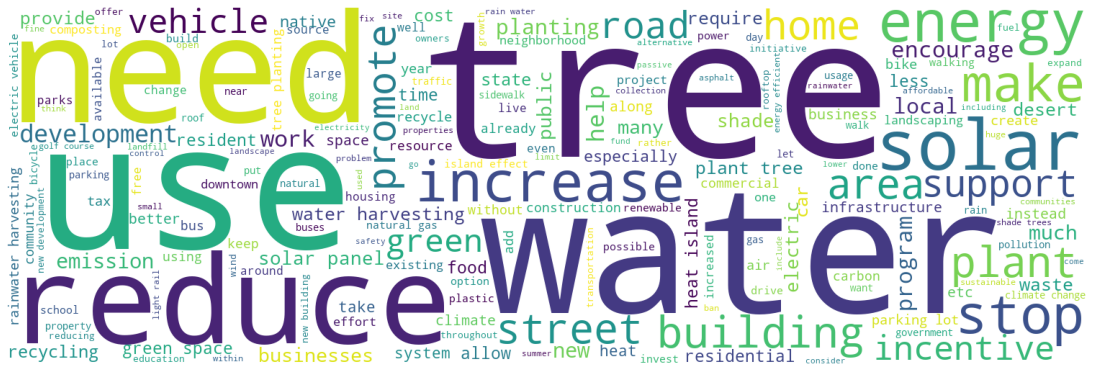

In [36]:
generate_sentiment_word_cloud(cmi_texts['pos'])

Negativas

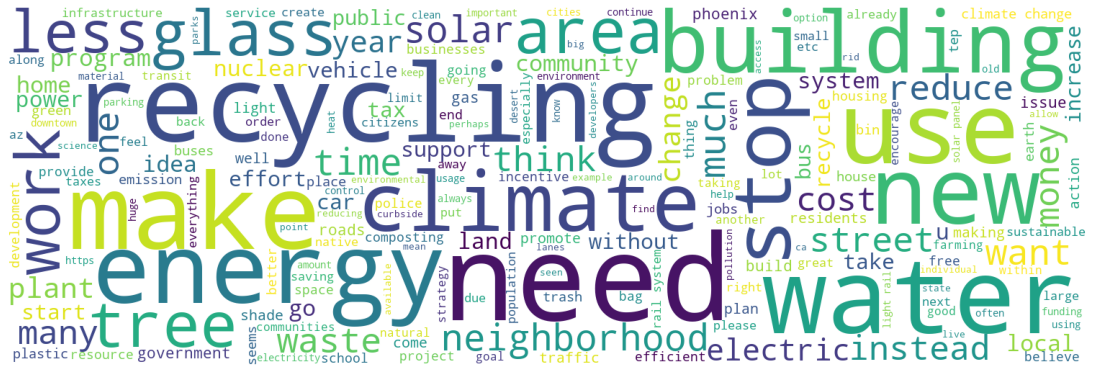

In [37]:
generate_sentiment_word_cloud(cmi_texts['neg'])

In [50]:
print(f"POS: {len(cmi_texts['pos'])}, NEG: {len(cmi_texts['neg'])}")

POS: 501, NEG: 127


### Pregunta 2: Do you have other climate adaptation ideas?

Positivas

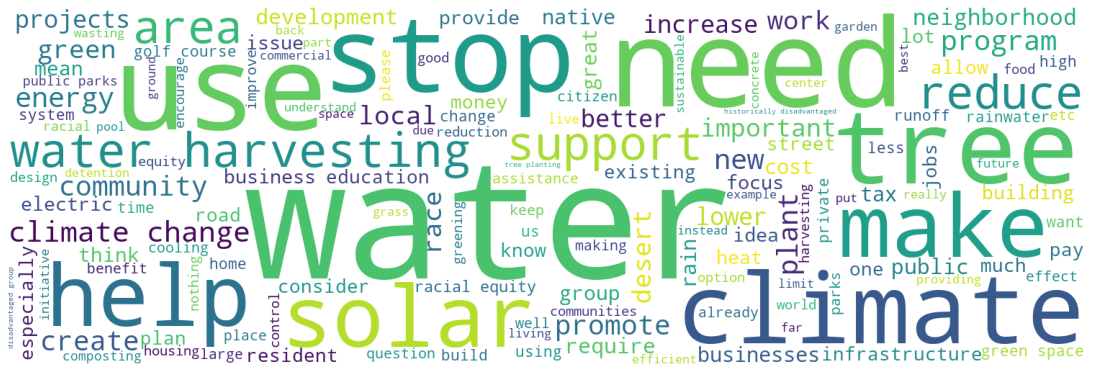

In [38]:
generate_sentiment_word_cloud(cai_texts['pos'])

Negativas

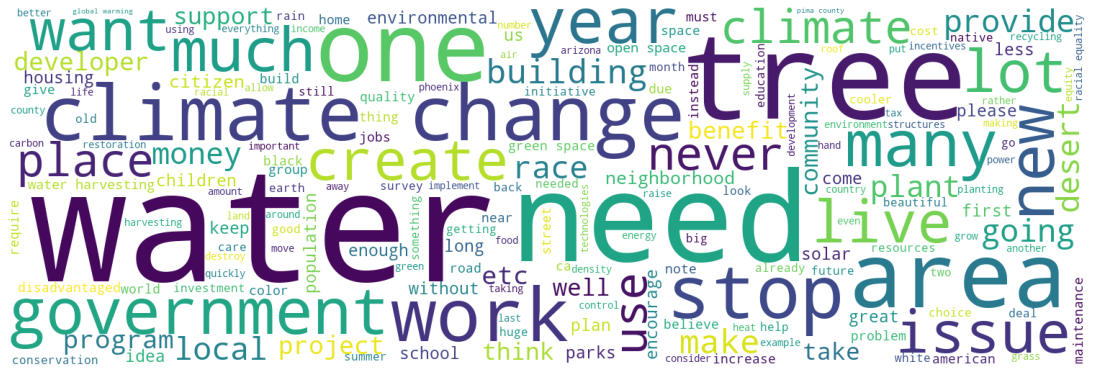

In [39]:
generate_sentiment_word_cloud(cai_texts['neg'])

In [51]:
print(f"POS: {len(cai_texts['pos'])}, NEG: {len(cai_texts['neg'])}")

POS: 324, NEG: 88


### Pregunta 3: Do you have other ideas for environmental equity, justice, and community resilience?

Positivas

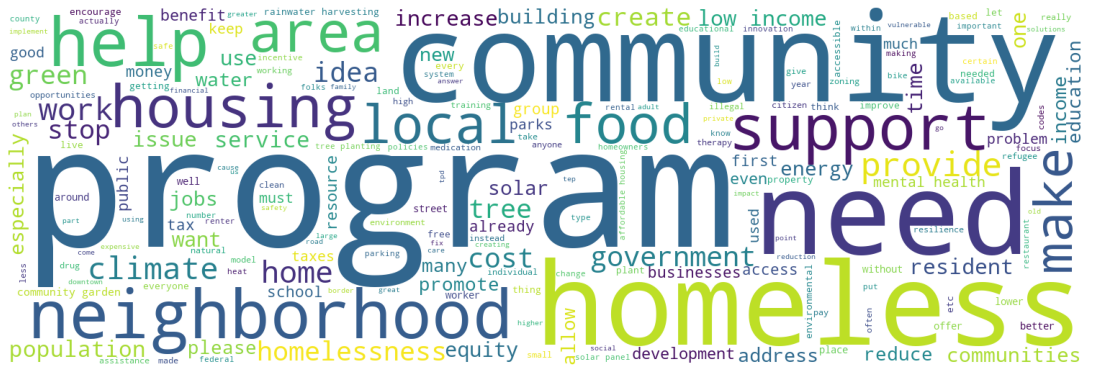

In [40]:
generate_sentiment_word_cloud(eei_texts['pos'])

Negativas

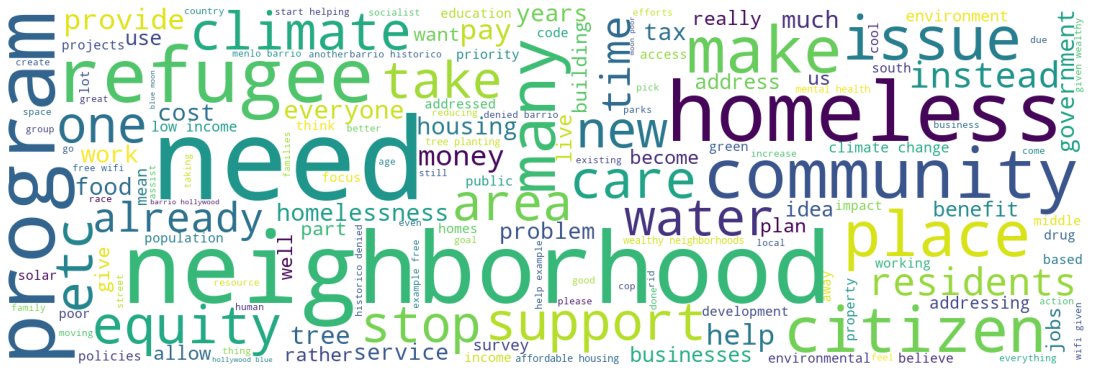

In [41]:
generate_sentiment_word_cloud(eei_texts['neg'])

In [52]:
print(f"POS: {len(eei_texts['pos'])}, NEG: {len(eei_texts['neg'])}")

POS: 273, NEG: 89


### Pregunta 4: Do you have other policy ideas?

Positivas

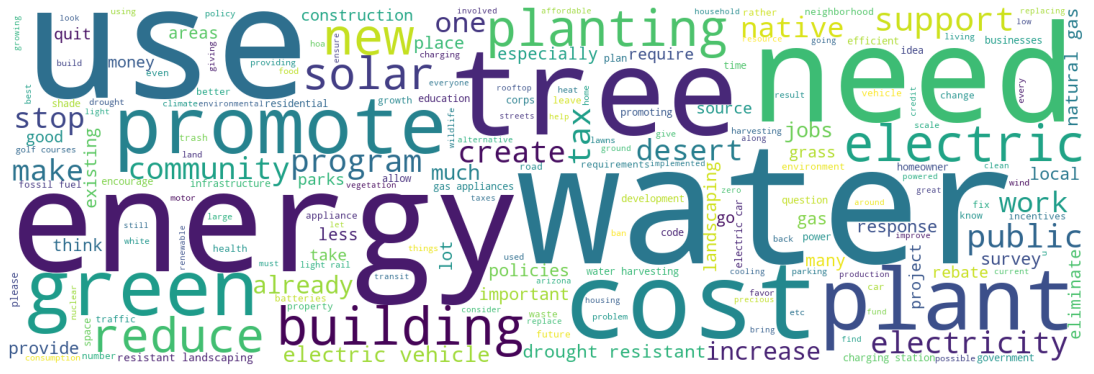

In [42]:
generate_sentiment_word_cloud(poi_texts['pos'])

Negativas

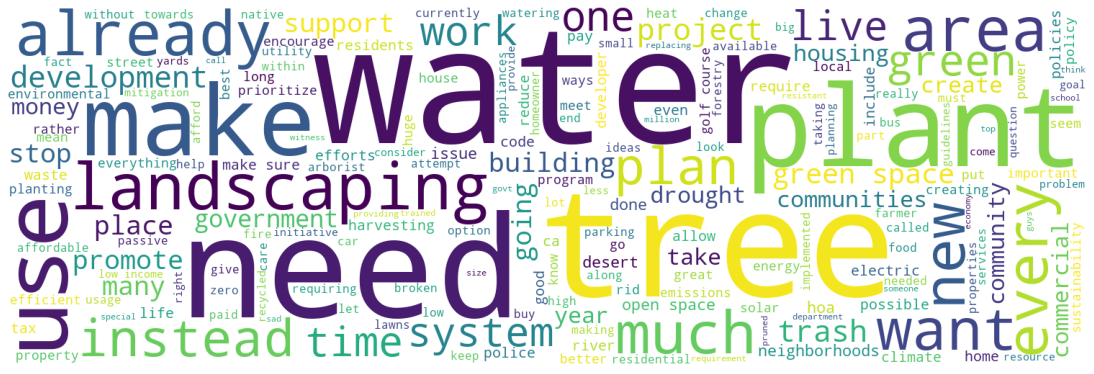

In [43]:
generate_sentiment_word_cloud(poi_texts['neg'])

In [53]:
print(f"POS: {len(poi_texts['pos'])}, NEG: {len(poi_texts['neg'])}")

POS: 210, NEG: 51


### Pregunta 5: Are you interested in participating in any other ways to help make Tucson environmentally sustainable?

Positivas

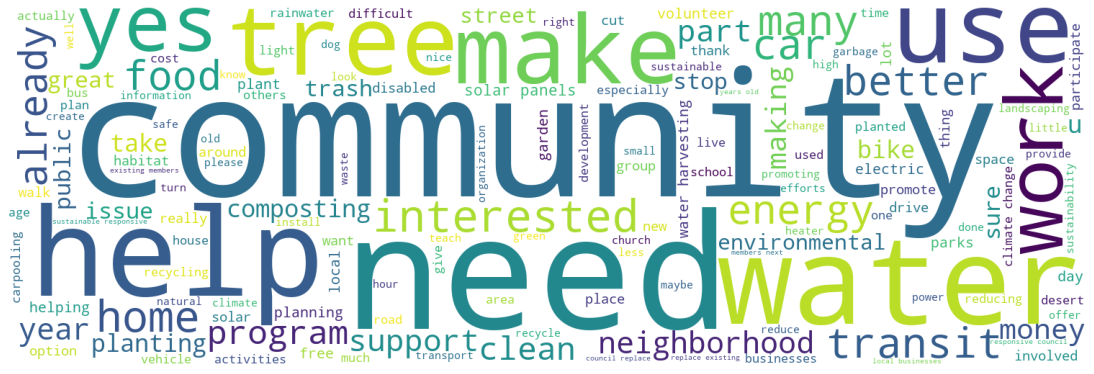

In [44]:
generate_sentiment_word_cloud(esi_texts['pos'])

Negativas

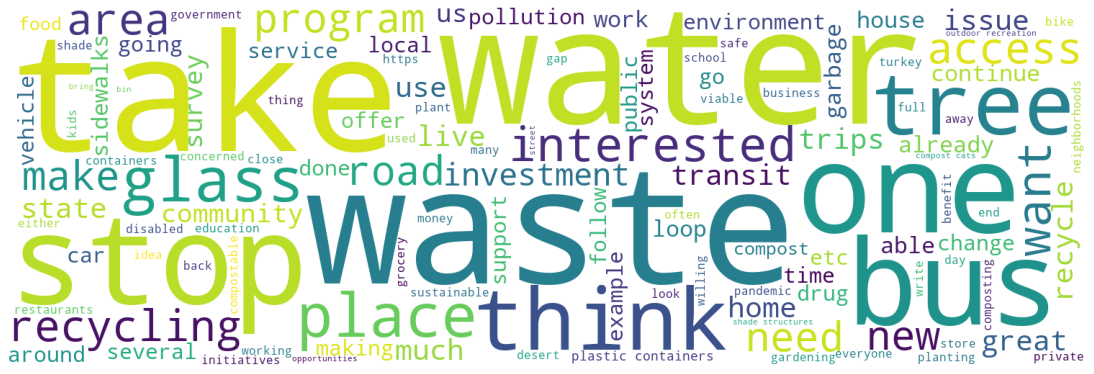

In [45]:
generate_sentiment_word_cloud(esi_texts['neg'])

In [54]:
print(f"POS: {len(esi_texts['pos'])}, NEG: {len(esi_texts['neg'])}")

POS: 219, NEG: 41


### Pregunta 6: Is there anything else you would like to share that was not already addressed?

Positivas

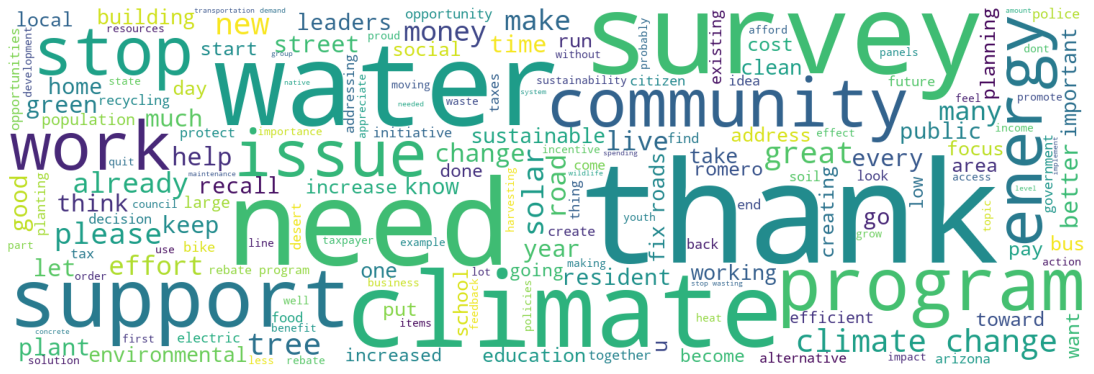

In [46]:
generate_sentiment_word_cloud(oti_texts['pos'])

Negativas

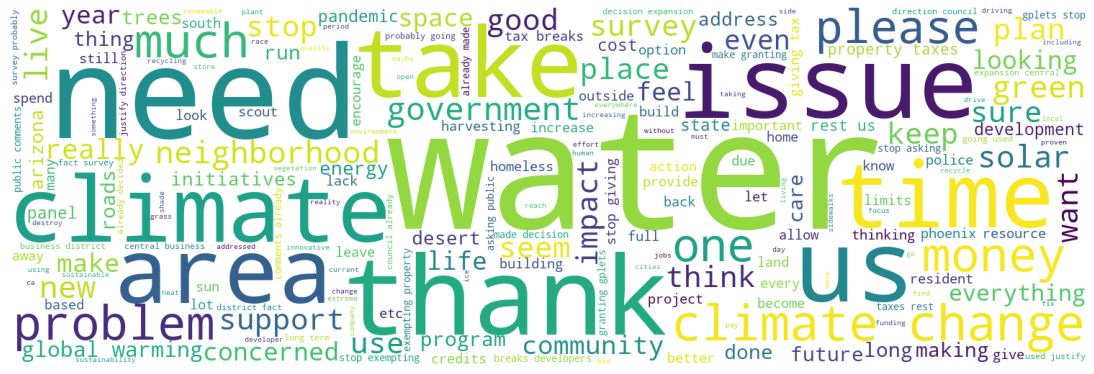

In [47]:
generate_sentiment_word_cloud(oti_texts['neg'])

In [55]:
print(f"POS: {len(oti_texts['pos'])}, NEG: {len(oti_texts['neg'])}")

POS: 227, NEG: 85
